### Tuning Observation

#### Load Dataset

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Load Dataset
path = './source/l1.csv'
data = pd.read_csv(path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,Time,ARIMA,SARIMA,ETS,RNN,LSTM,CNN,GRU,TCN,Actual,Raw
0,2023-09-08 02:39:20,6441.043304,6418.898308,5666.291029,6601.0280,5478.6753,6638.8477,6664.3510,5630.9487,6469.514691,7940.0
1,2023-09-08 02:39:25,6541.575640,6381.338713,4685.323662,6723.0700,5925.6016,7118.9920,6613.4834,5884.9297,6563.862986,4530.0
2,2023-09-08 02:39:30,6613.411729,6157.460136,4071.063517,6623.3076,6057.7466,7035.4110,6298.2847,5593.3057,6421.669443,6500.0
3,2023-09-08 02:39:35,6664.742713,5877.056731,3326.821215,6327.1855,5581.9307,6997.9155,6172.9956,5557.7876,5901.408527,6770.0
4,2023-09-08 02:39:40,6701.421629,5715.953666,2945.783128,6270.8510,5654.8150,6251.2275,5968.4700,4750.7725,5060.928031,5710.0


#### Find Pearson Correlation

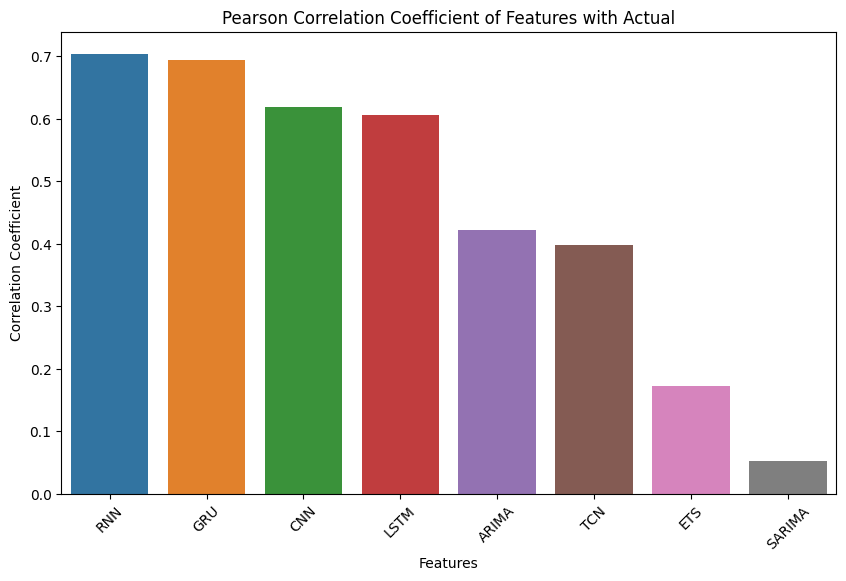

,Correlation with Actual
RNN,0.703402
GRU,0.693897
CNN,0.619292
LSTM,0.605599
ARIMA,0.421689
TCN,0.398210
ETS,0.172886
SARIMA,0.052006


In [3]:
# Calculating Pearson correlation coefficient between each feature and the 'Actual' column
features = ['ARIMA', 'SARIMA', 'ETS', 'RNN', 'LSTM', 'CNN', 'GRU', 'TCN']
correlation_target = 'Actual'
prediction_target = 'Raw'
rmse_target = 'Raw'
correlations = {feature: pearsonr(data[feature], data[correlation_target])[0] for feature in features}

# Sorting the features based on their correlation in descending order
sorted_features = sorted(correlations, key=correlations.get, reverse=True)

# Displaying the correlation coefficients
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=[f'Correlation with {correlation_target}'])
correlation_df_sorted = correlation_df.reindex(sorted_features)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df_sorted.index, y=correlation_df_sorted[f'Correlation with {correlation_target}'])
plt.title(f'Pearson Correlation Coefficient of Features with {correlation_target}')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

correlation_df_sorted

In [4]:
# Recalculating Pearson correlation coefficient between each feature and the 'Actual' column
numeric_columns = features + [prediction_target]
numeric_data = data[numeric_columns]
cleaned_data = numeric_data.dropna(subset=[prediction_target])
compare_rmse_column = data[rmse_target].dropna().iloc[1000:]

# Preparing the training and testing datasets
train_data = cleaned_data.iloc[:1000]
test_data = cleaned_data.iloc[1000:]

#### Linear Regression

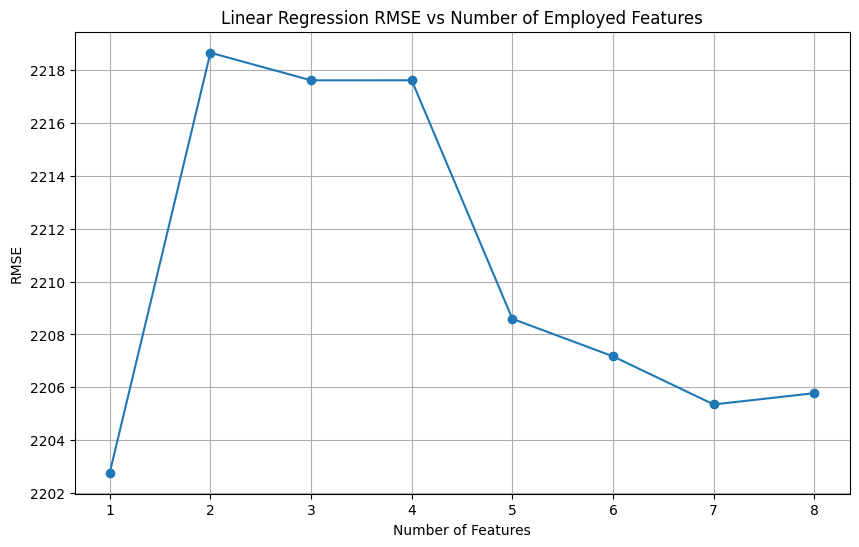

[2202.7674180257495,
 2218.660095910899,
 2217.6160706663018,
 2217.616638496971,
 2208.590512351162,
 2207.1717223932924,
 2205.350735643689,
 2205.7773065498736]

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List to store RMSE values for each iteration
rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the model
    model = LinearRegression()
    model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the model
    predictions = model.predict(test_data[selected_features])
    rmse = mean_squared_error(compare_rmse_column, predictions, squared=False)
    rmse_values.append(rmse)

# Plotting the graph of RMSE vs number of employed features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rmse_values, marker='o')
plt.title('Linear Regression RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values
rmse_values

#### Random Forest

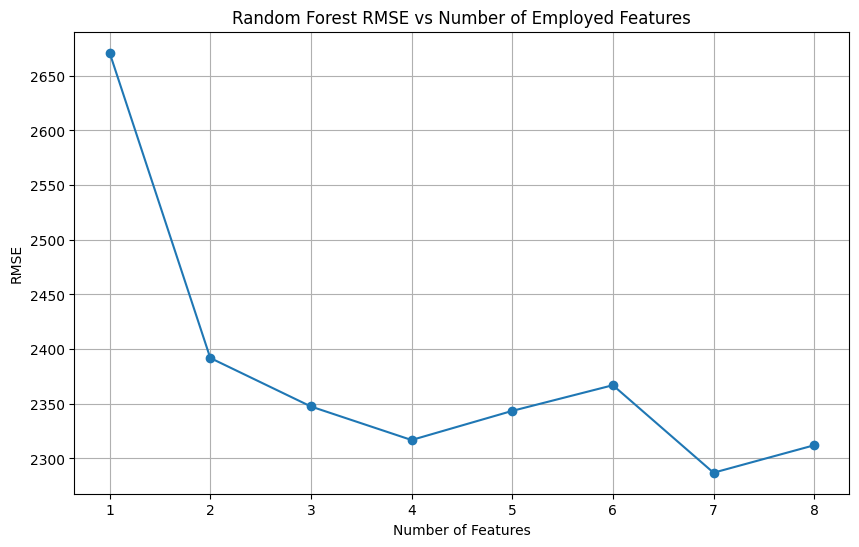

[2671.14727327027,
 2391.8733422222845,
 2347.4895199988437,
 2316.821449081133,
 2343.469992164269,
 2366.96772301618,
 2286.9049106047237,
 2312.0351363189966]

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Random Forest
rf_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the Random Forest model
    rf_predictions = rf_model.predict(test_data[selected_features])
    rf_rmse = mean_squared_error(compare_rmse_column, rf_predictions, squared=False)
    rf_rmse_values.append(rf_rmse)

# Plotting the graph of RMSE vs number of employed features for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rf_rmse_values, marker='o')
plt.title('Random Forest RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Random Forest
rf_rmse_values

#### Feed Forward Neural Network

8/8 [==============================] - 0s 2ms/step


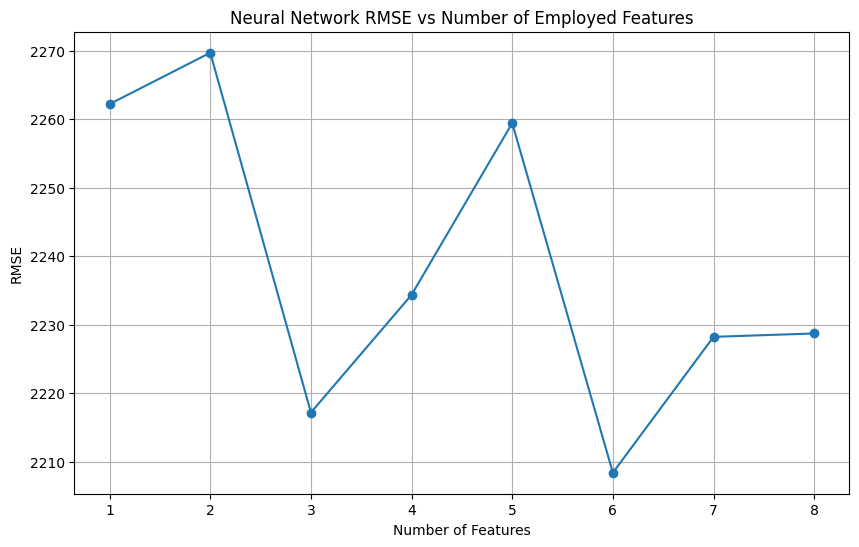

[2262.2265159944964,
 2269.7271524832713,
 2217.1649368985622,
 2234.3600434341556,
 2259.4465451743304,
 2208.369484314277,
 2228.2213079834064,
 2228.711765041063]

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Neural Network
nn_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[prediction_target].values
    y_test = test_data[prediction_target].values

    # Define the Neural Network model architecture
    model = Sequential([
        Dense(50, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(50, activation="relu"),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss="mse")

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Predict using the model
    nn_predictions = model.predict(X_test).flatten()

    # Calculate RMSE
    nn_rmse = mean_squared_error(compare_rmse_column, nn_predictions, squared=False)
    nn_rmse_values.append(nn_rmse)

# Plotting the graph of RMSE vs number of employed features for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), nn_rmse_values, marker='o')
plt.title('Neural Network RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Neural Network
nn_rmse_values